## Imports
**Importing pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the E-commerce Customers CSV file. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* **Avg. Session Length:** Average session of in-store style advice sessions.
* **Time on App:** Average time spent on App in minutes
* **Time on Website:** Average time spent on Website in minutes
* **Length of Membership:** How many years the customer has been a member. 

**Reading in the Ecommerce Customers csv file as a DataFrame called df.**

We can predict for a customer how much he is going to spend on a website using the given data.

In [2]:
df = pd.read_csv("Ecommerce Customers.csv")

**Checking the head of customers, and its info() and describe() methods.**

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,498.000000,498.000000,498.000000,495.000000,495.000000
mean,33.054953,12.045917,37.063336,3.526269,499.762817
std,0.994011,0.990587,1.009300,1.001067,79.223139
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.344967,11.387235,36.353186,2.926668,445.406013
50%,33.086914,11.980553,37.069367,3.531402,499.140152
75%,33.714649,12.731589,37.717324,4.120463,549.882368
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                499 non-null    object 
 3   Avg. Session Length   498 non-null    float64
 4   Time on App           498 non-null    float64
 5   Time on Website       498 non-null    float64
 6   Length of Membership  495 non-null    float64
 7   Yearly Amount Spent   495 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**
**Using seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.**

In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

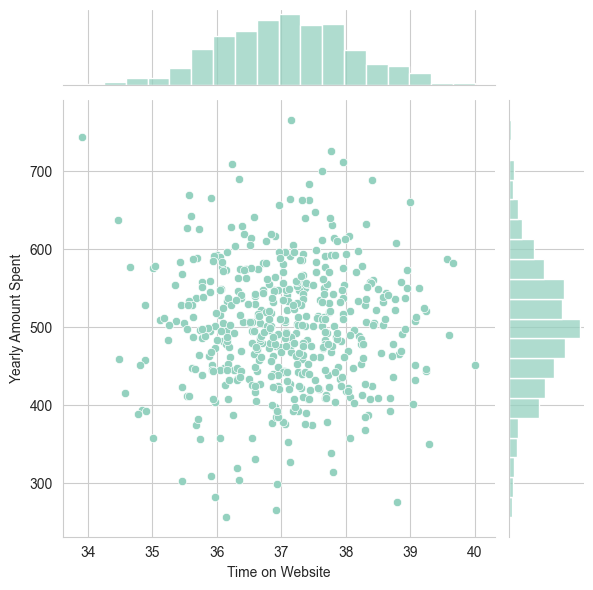

In [7]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

### As far as trying to interpret the sort of scatterplot there doesn't appear to be a clear trend between time on a Web site and yearly amounts spent just by looking at this visually.

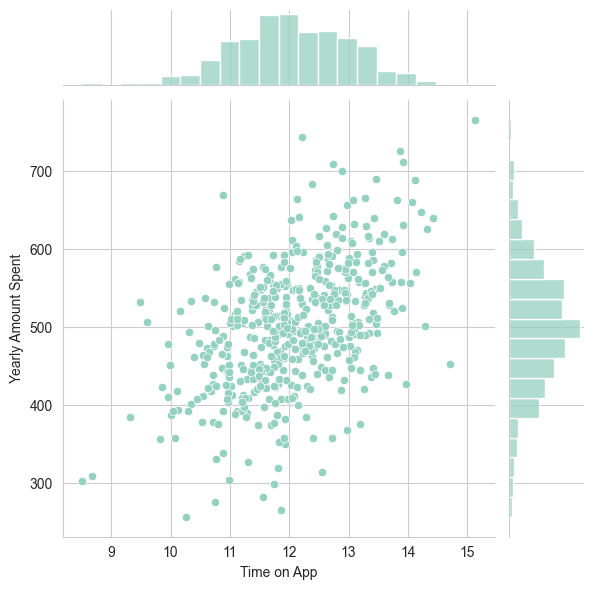

In [8]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

It looks like there begins to be some sort of correlation between increased time on app increasing yearly amount spent expenditure.

**Using jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

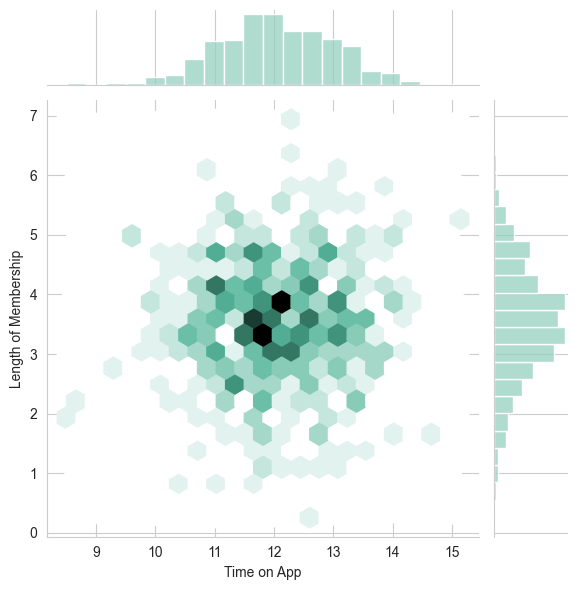

In [9]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=df)

**Let's explore these types of relationships across the entire data set. Using pairplot to recreate the plot below.**

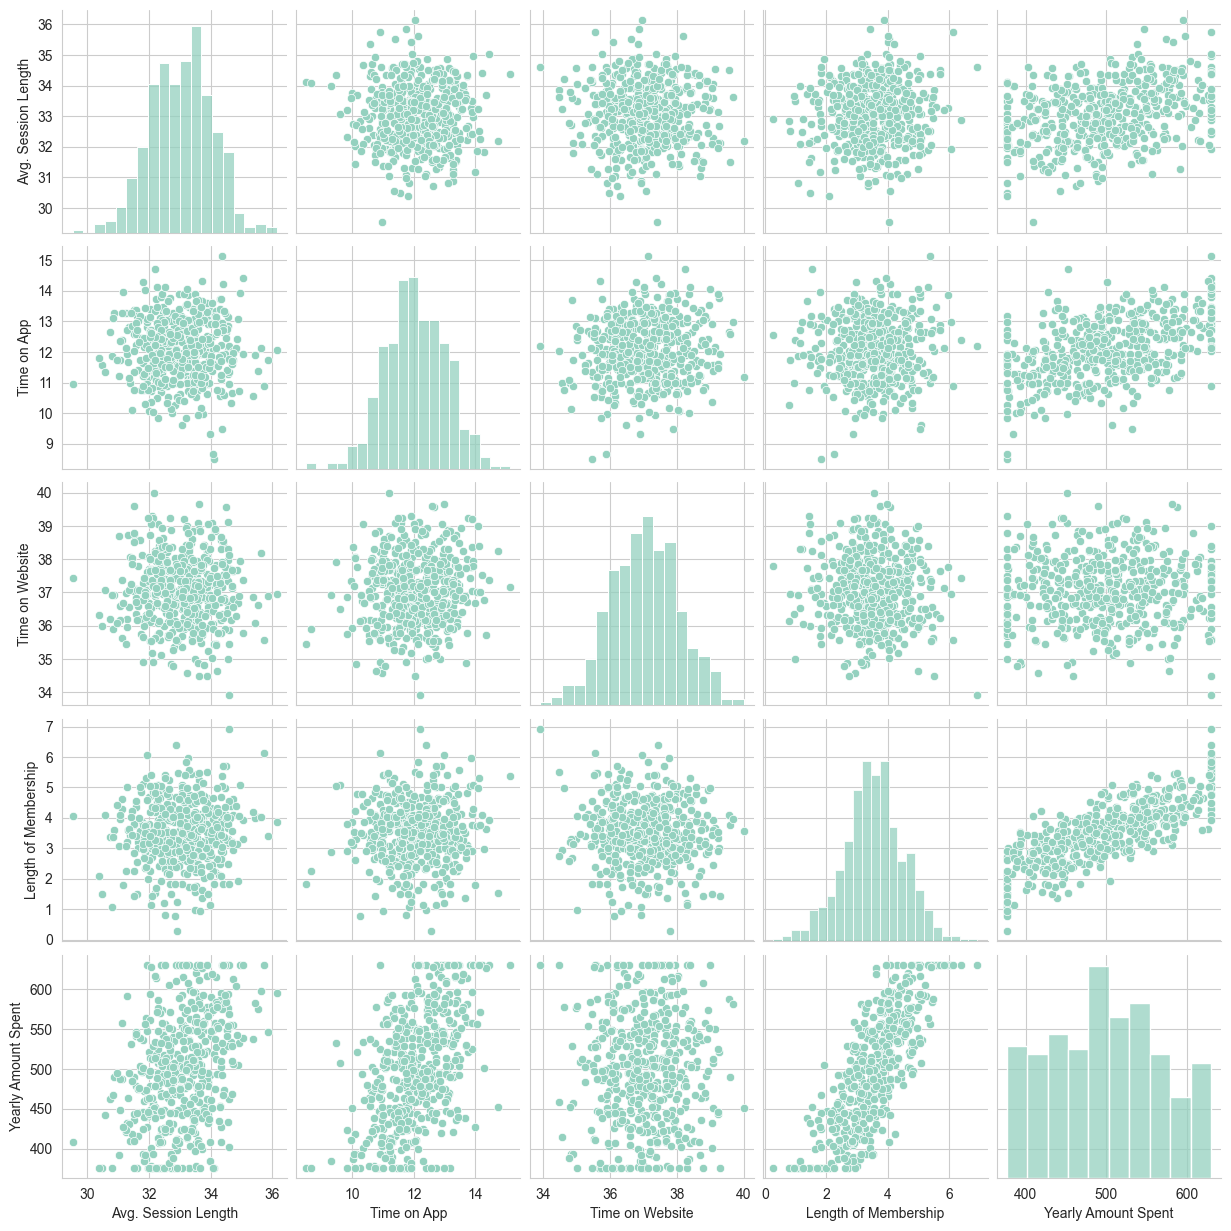

In [41]:
sns.pairplot(df)

**Based off this plot Length of Membership to be the most correlated feature with Yearly Amount Spent**

In [11]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

**Creating a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

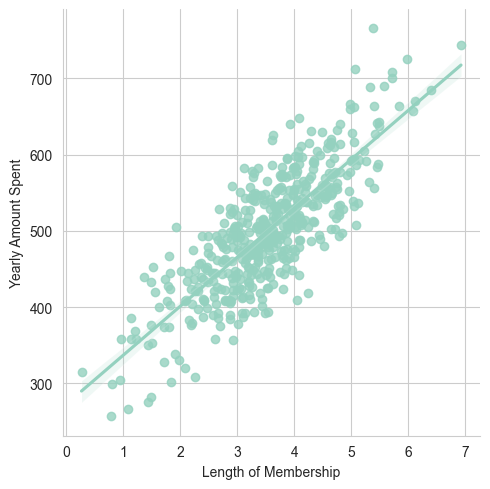

In [12]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

# Null Value Treatment

In [13]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  1
Avg. Session Length     2
Time on App             2
Time on Website         2
Length of Membership    5
Yearly Amount Spent     5
dtype: int64

**We have few null values lets drop them**

In [14]:

df.dropna(inplace = True)

In [15]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [16]:
df.shape

(486, 8)

# Outliers Treatment

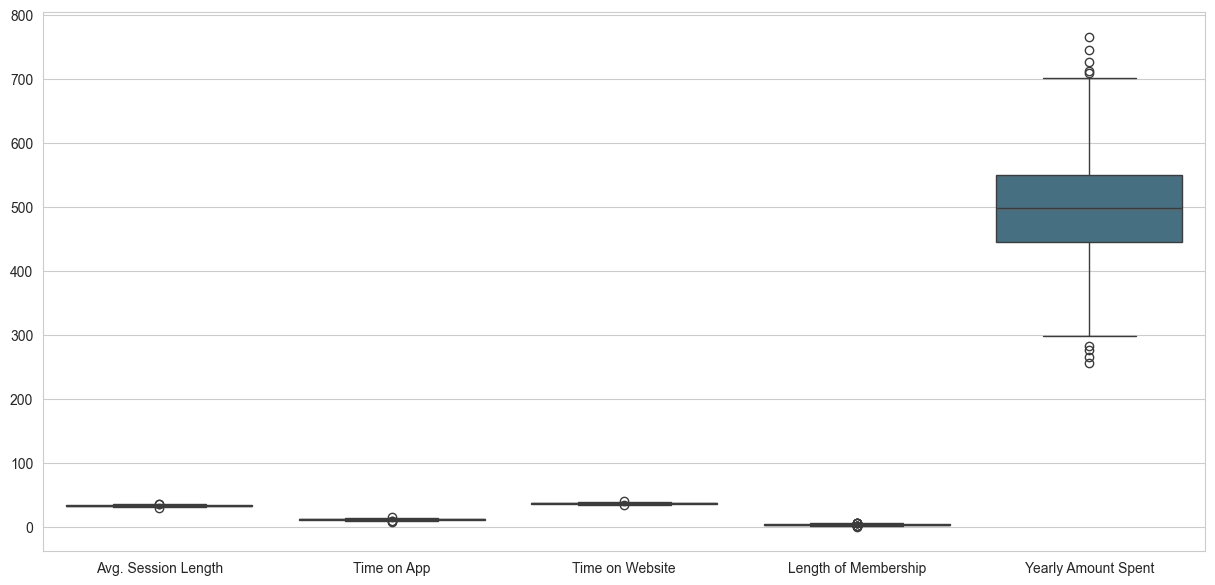

In [17]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership','Yearly Amount Spent']])
plt.show()

In [18]:
from scipy.stats.mstats import winsorize
winsorize(df['Yearly Amount Spent'],(0.05,0.05),inplace=True)
plt.show()


lets check now

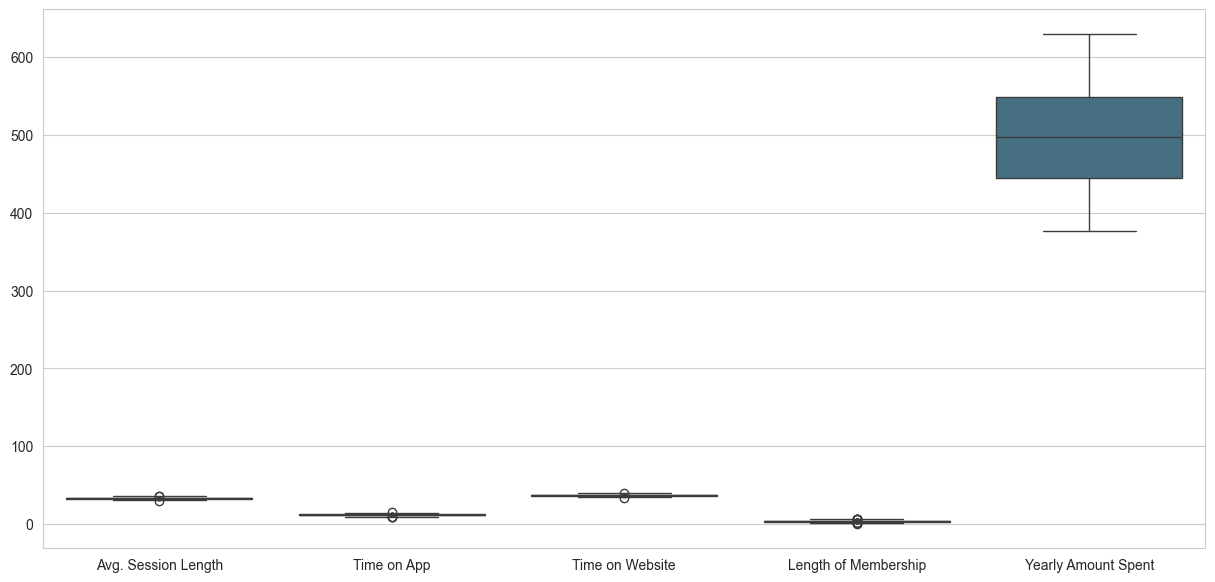

In [19]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership','Yearly Amount Spent']])
plt.show()

**There are no outliers as we can see.**

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
**Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**

In [20]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [21]:
y = df['Yearly Amount Spent']

In [22]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

**Using model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training the Model

Now its time to train our model on our training data!

**Importing LinearRegression from sklearn.linear_model**

In [25]:
from sklearn.linear_model import LinearRegression

**Creating an instance of a LinearRegression() model named lm.**

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
y_pred = lr.predict(X_test)
y_pred

array([343.43499454, 443.33096268, 509.61558998, 419.87589461,
       505.92830431, 436.45622293, 534.8680139 , 538.35531721,
       504.90516882, 484.70019622, 450.19379179, 591.26854033,
       511.57952815, 478.32348627, 499.53941082, 540.34885671,
       503.01493752, 488.50032982, 572.89998363, 424.09687799,
       477.74665316, 578.40153431, 428.30601178, 562.80262407,
       455.55336763, 520.79145328, 561.04027914, 506.1473973 ,
       589.13925928, 520.48235803, 472.84140349, 465.01947669,
       456.43641972, 517.80339511, 580.86826772, 510.6835485 ,
       590.83587354, 480.90462803, 484.23850692, 653.60889727,
       484.20278691, 582.01021132, 455.98803786, 544.49836428,
       465.7110525 , 527.2219676 , 599.76729831, 591.35553137,
       512.17821042, 461.63119464, 548.32178032, 534.70719899,
       558.7312296 , 553.52319824, 440.08480914, 380.5005606 ,
       582.37904957, 496.00523017, 510.33228829, 463.95897532,
       482.60008   , 623.39213878, 429.8140094 , 591.56

In [33]:
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)
print("Accuracy on test set:", lr.score(X_test, y_test))


Intercept: -832.6028769741074
Coefficients: [21.59009013 32.81351602  1.12068816 51.20274654]
Accuracy on test set: 0.9528584277192506


## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculated the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [38]:
# calculate these metrics by hand!
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R² Score (Accuracy):", r2_score(y_test, y_pred))

MAE: 11.660736023089036
MSE: 225.37834319752247
RMSE: 15.012606142756242
R² Score (Accuracy): 0.9528584277192506


## Residuals

We have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plotting a histogram of the residuals and make sure it looks normally distributed. Using either seaborn distplot, or just plt.hist().**

/var/folders/c_/g63m5y691lbg4xfnn705s_1r0000gn/T/ipykernel_57759/3603801925.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred),bins=50);


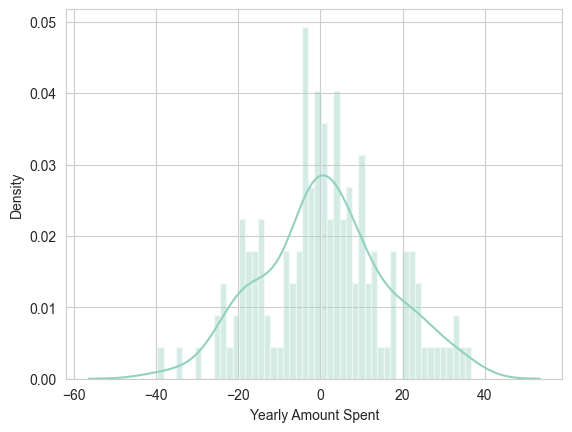

In [35]:
sns.distplot((y_test-y_pred),bins=50);